In [1]:
import numpy as np
import cvxpy as cp
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt



In [27]:
# Resolver SVM con CVXPY
def solve_svm_with_cvxpy_l2(X, y, C=1.0):
    n_samples, n_features = X.shape
    w = cp.Variable(n_features)
    b = cp.Variable()
    xi = cp.Variable(n_samples)

    # Definir el problema
    # Opción B (Usando la función norm directamente)
    objective = cp.Minimize(0.5 * cp.norm(w, 2)**2 + C * cp.sum(xi))
    constraints = [cp.multiply(y, X@w+b) >= 1-xi, 
                   xi >= 0]
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value, b.value, xi.value

# Resolver SVM con CVXPY
def solve_svm_with_cvxpy_l1(X, y, C=1.0):
    n_samples, n_features = X.shape
    w = cp.Variable(n_features)
    b = cp.Variable()
    xi = cp.Variable(n_samples)

    # Definir el problema
    # Opción B (Usando la función norm directamente)
    objective = cp.Minimize(0.5 * cp.norm(w, 1) + C * cp.sum(xi))
    constraints = [cp.multiply(y, X@w+b) >= 1-xi, 
                   xi >= 0]
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value, b.value, xi.value

In [28]:
from sklearn.svm import SVR

def solve_svm_with_sklearn(X, y, C=1.0):
    # Para valores continuos usamos Regression (SVR)
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    return model

In [29]:
# Generar datos sintéticos
X, y = make_classification(n_samples=50, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=1)
y = 2 * y - 1  # Convertir etiquetas a {-1, 1}

In [31]:
# Calcular solución con CVXPY
C = 0.1
w_cvx_l2, b_cvx_l2, xi_cvx_l2 = solve_svm_with_cvxpy_l2(X, y, C)

print("Solución con CVXPY")
print(w_cvx_l2)
print(b_cvx_l2)
print(xi_cvx_l2)

w_cvx_l1, b_cvx_l1, xi_cvx_l1 = solve_svm_with_cvxpy_l1(X, y, C)

print("\nSolución con CVXPY")
print(w_cvx_l1)
print(b_cvx_l1)
print(xi_cvx_l1)


# 1. Llama a la función (que devuelve el objeto modelo)
modelo_svm = solve_svm_with_sklearn(X, y, C)

# 2. Extrae los parámetros del objeto manualmente
w_sklearn = modelo_svm.coef_       # Los pesos (pendientes)
b_sklearn = modelo_svm.intercept_  # El sesgo (punto de corte)
print("\nResultados SVM")
print("Pesos (w):", w_sklearn)
print("Sesgo (b):", b_sklearn)

Solución con CVXPY
[-0.27708669  1.01037274]
-0.07361434289277109
[ 1.04751040e-08  1.26039753e-01  4.01613606e-01  9.70837973e-01
 -5.73892657e-10 -4.85928797e-10 -4.26502172e-10 -4.35805738e-10
 -1.40292742e-10 -3.92275284e-10  6.80112097e-01 -3.93387496e-10
 -3.77347096e-10  1.44404628e+00 -4.19098549e-10  2.06621402e-01
 -5.11180030e-10 -4.87898882e-10 -5.37523134e-10  6.26667657e-02
 -5.70668215e-10 -3.79237578e-10  7.76544173e-01  1.34218673e+00
 -3.73767900e-10  3.49972819e-01 -5.86098137e-10  1.99912146e-01
 -4.34296054e-10 -3.54115905e-11  8.30328807e-02 -5.24115370e-10
 -4.81981507e-10  4.58110059e-02 -4.73416933e-10  1.02719253e+00
 -5.78535398e-10 -6.44941954e-10  5.32936321e-02  3.51162383e-01
 -6.59319581e-10  9.35372887e-02 -6.12064902e-10 -3.19612211e-10
 -4.32407429e-10  1.37892466e-09  7.12879098e-01  9.62362695e-02
 -4.23844613e-10 -4.82138136e-10]

Solución con CVXPY
[-0.25446056  1.23286026]
0.022666506996422354
[1.32026994e-11 2.62895556e-01 8.02546010e-02 1.00633

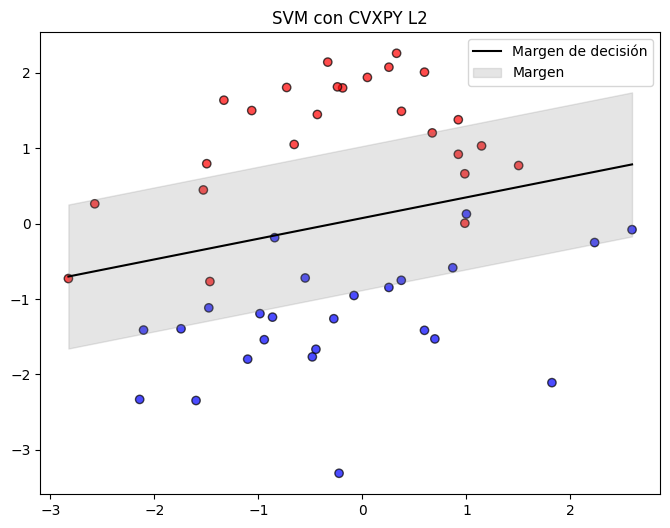

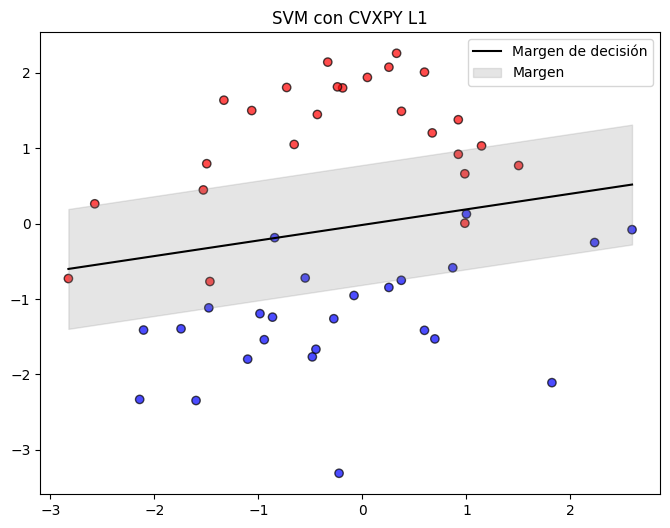

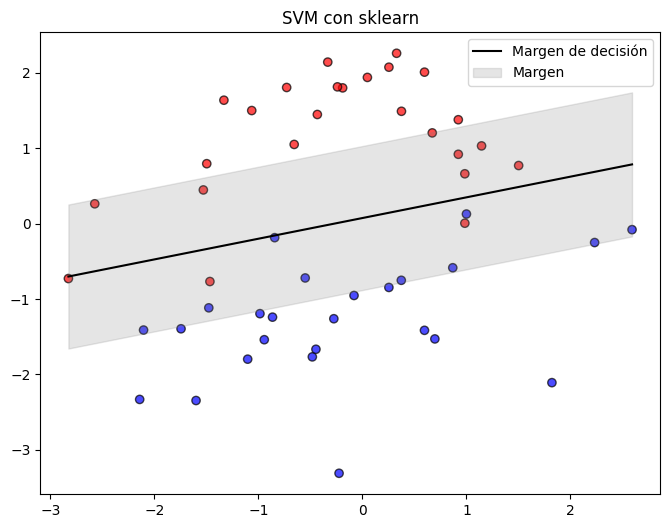

In [34]:
# Visualizar resultados
def plot_svm(X, y, w, b, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7, edgecolor='k')
    x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_line = -(w[0] * x_line + b) / w[1]
    plt.plot(x_line, y_line, 'k-', label="Margen de decisión")
    plt.fill_between(x_line, y_line - 1/np.linalg.norm(w), y_line + 1/np.linalg.norm(w), color='gray', alpha=0.2, label="Margen")
    plt.title(title)
    plt.legend()
    plt.show()

# Visualización con CVXPY
plot_svm(X, y, w_cvx_l2, b_cvx_l2, title="SVM con CVXPY L2")
plot_svm(X, y, w_cvx_l1, b_cvx_l1, title="SVM con CVXPY L1")

# Asegúrate de extraer b_sklearn correctamente (es un array de un solo elemento)
b_val = b_sklearn[0] 

# Aplana w_sklearn para convertirlo de [[w1, w2]] a [w1, w2]
w_val = w_sklearn.flatten()

# Ahora llama a la función con los valores corregidos
plot_svm(X, y, w_val, b_val, title="SVM con sklearn")

In [38]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target
y = 2 * y - 1 

# Crear un DataFrame para exploración
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Mostrar primeras filas
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 0. Definir X_train, X_test, y_train, y_test
# Dividimos los datos: 80% para entrenar y 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Llama a la función del SVM (asegúrate de que C esté definida, ej: C=1.0)
C = 0.1
modelo_svm = solve_svm_with_sklearn(X_train, y_train, C)

# 2. Instanciar el modelo de Regresión Lineal
modelo_sk = LinearRegression()

# 3. Ajustar el modelo a los datos de entrenamiento
modelo_sk.fit(X_train, y_train)

# 4. Obtener los coeficientes estimados (beta)
beta_sk = modelo_sk.coef_
intercept_sk = modelo_sk.intercept_

# 5. Realizar predicciones
y_pred_sk = modelo_sk.predict(X_test)

# 6. Evaluar el rendimiento
mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print("--- Resultados con Sklearn ---")
print(f"Intercepto (b): {intercept_sk:.4f}")
print(f"Primeros 3 coeficientes: {beta_sk[:3]}")
print(f"MSE en Test: {mse_sk:.4f}")
print(f"R^2 Score: {r2_sk:.4f}")

--- Resultados con Sklearn ---
Intercepto (b): 5.1126
Primeros 3 coeficientes: [ 0.39426044 -0.00558945 -0.04555173]
MSE en Test: 0.2564
R^2 Score: 0.7271


In [44]:
# Calcular solución con CVXPY

# --- Calcular solución con CVXPY ---

# 1. Asegurarnos de tener C definida
C_val = 0.1

# 2. Llamar a la función que ya tenemos definida
# Nota: La función nos devuelve (w, b, xi)
w_cvx_l2, b_cvx_l2, xi_cvx_l2 = solve_svm_with_cvxpy_l2(X_train, y_train, C=C_val)

w_cvx_l1, b_cvx_l1, xi_cvx_l1 = solve_svm_with_cvxpy_l1(X_train, y_train, C=C_val)

# 3. Mostrar los resultados obtenidos
print("--- Resultados con CVXPY ---")

print("L2")
print(f"Sesgo (b) calculado: {b_cvx_l2:.4f}")
print(f"Primeros coeficientes (w): {w_cvx_l2[:3]}")

print("\nL1")
print(f"Sesgo (b) calculado: {b_cvx_l1:.4f}")
print(f"Primeros coeficientes (w): {w_cvx_l1[:3]}")
    
    # Contar cuántos vectores soporte hay (donde xi > 0 o alpha es relevante)
    # En este caso, xi nos indica qué puntos violan el margen o están en él
num_sv_l2 = np.sum(xi_cvx_l2 > 1e-5)
print(f"\nNúmero de puntos con margen violado o en el borde L2 (xi > 0): {num_sv_l2}")

num_sv_l1 = np.sum(xi_cvx_l1 > 1e-5)
print(f"Número de puntos con margen violado o en el borde L1 (xi > 0): {num_sv_l1}")



--- Resultados con CVXPY ---
L2
Sesgo (b) calculado: 18.8490
Primeros coeficientes (w): [ 0.27765699  0.06296016 -0.17042372]

L1
Sesgo (b) calculado: 20.5188
Primeros coeficientes (w): [ 2.00401673e-11  5.05595557e-02 -1.07662775e-01]

Número de puntos con margen violado o en el borde L2 (xi > 0): 46
Número de puntos con margen violado o en el borde L1 (xi > 0): 51


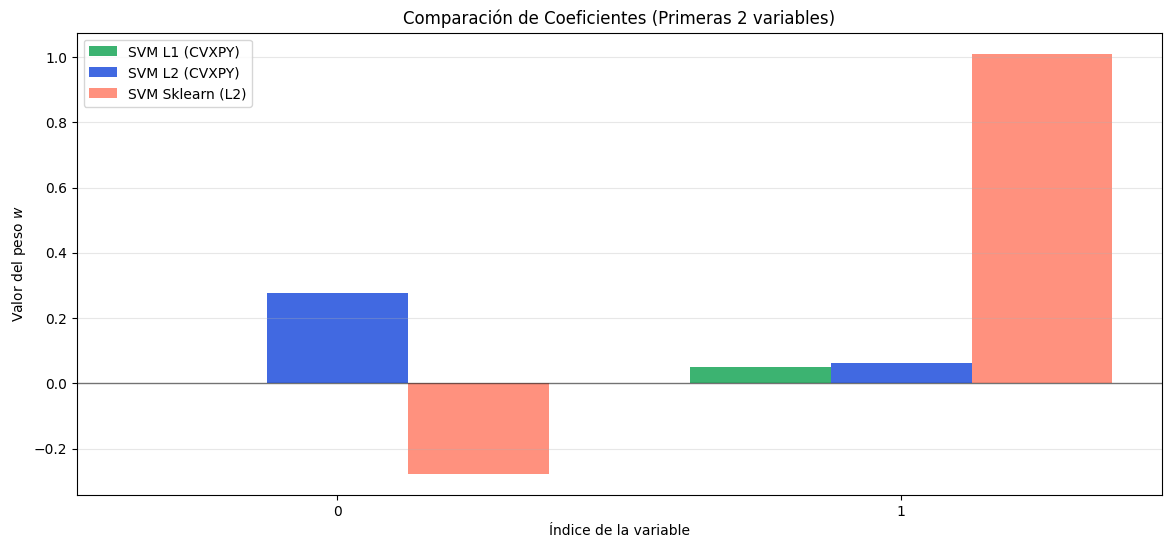

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def analizar_coeficientes_svm(w_l1, w_l2, w_sklearn):
    # 1. Convertir todo a arrays de numpy y aplanar por si acaso
    w_l1 = np.array(w_l1).flatten()
    w_l2 = np.array(w_l2).flatten()
    w_sklearn = np.array(w_sklearn).flatten()

    # 2. Encontrar el tamaño común (por seguridad)
    # Si uno es más corto, tomamos el mínimo para que no de error
    n_features = min(len(w_l1), len(w_l2), len(w_sklearn))
    
    # Recortamos los vectores al mismo tamaño
    w_l1 = w_l1[:n_features]
    w_l2 = w_l2[:n_features]
    w_sklearn = w_sklearn[:n_features]
    
    indices = np.arange(n_features)
    ancho = 0.25

    plt.figure(figsize=(14, 6))

    # Dibujamos las barras
    plt.bar(indices - ancho, w_l1, ancho, label='SVM L1 (CVXPY)', color='mediumseagreen')
    plt.bar(indices, w_l2, ancho, label='SVM L2 (CVXPY)', color='royalblue')
    plt.bar(indices + ancho, w_sklearn, ancho, label='SVM Sklearn (L2)', color='tomato', alpha=0.7)

    plt.axhline(0, color='black', linewidth=1, alpha=0.5)
    plt.title(f'Comparación de Coeficientes (Primeras {n_features} variables)')
    plt.xlabel('Índice de la variable')
    plt.ylabel('Valor del peso $w$')
    plt.xticks(indices)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# Ejecuta de nuevo
analizar_coeficientes_svm(w_cvx_l1, w_cvx_l2, w_sklearn)